# **MNIST**

Import TensorFlow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

LoadLoading  the MNIST dataset





In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


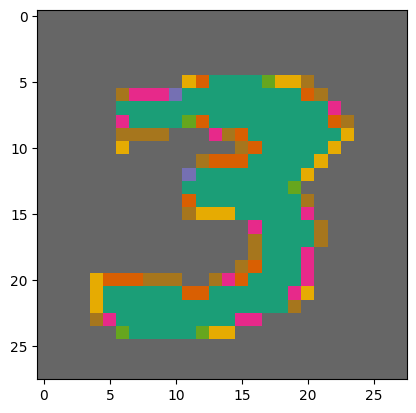

In [3]:
image_index = 27  # index range = 0 to 10000   27
plt.imshow(x_train[image_index].reshape(28, 28),cmap='Dark2_r')
plt.show()



Creating the model

In [4]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Predicting the model

In [5]:
predictions=model(x_train[:1]).numpy()
predictions

array([[3.1082425e-05, 6.6143382e-01, 2.8395165e-20, 2.0688700e-03,
        7.7510726e-10, 1.2190614e-09, 2.6180587e-07, 5.4473175e-12,
        3.3646598e-01, 1.1676164e-15]], dtype=float32)

In [6]:
probability=tf.nn.softmax(predictions).numpy()
probability

array([[0.08818878, 0.1708665 , 0.08818605, 0.08836868, 0.08818605,
        0.08818605, 0.08818606, 0.08818605, 0.12345969, 0.08818605]],
      dtype=float32)

reducing the loss using Spaese Categorical Crossentropy Function

In [ ]:
model.compile(optimizer ='adam',
              loss=loss_fn,
              metrics=["accuracy"])

Training the model

In [8]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2208 - accuracy: 0.9471
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0639 - accuracy: 0.9807
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0519 - accuracy: 0.9844
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0420 - accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0375 - accuracy: 0.9887


Evaluating the model

In [9]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 2s - loss: 0.0479 - accuracy: 0.9873 - 2s/epoch - 8ms/step


[0.04785426706075668, 0.9872999787330627]

Lest test the model after training it and plot the following with prediction.

1/1 [==============================] - 0s 122ms/step
predicted value =  4


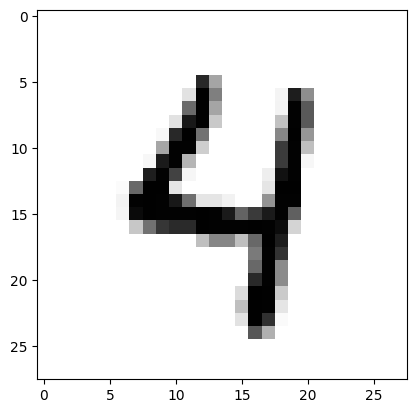

In [10]:
image_index = 27  # index range = 0 to 10000   27
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("predicted value = ",pred.argmax())

1/1 [==============================] - 0s 40ms/step


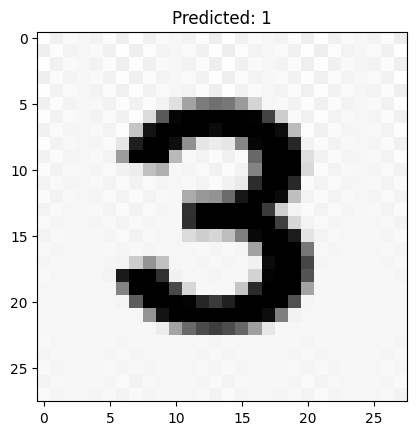

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# File path of the image you want to predict
file_path = '/content/1.png'  # Change this to your image file path

# Read the image using OpenCV
input_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to match the MNIST input shape (28x28)
resized_image = cv2.resize(input_image, (28, 28), interpolation=cv2.INTER_AREA)

# Normalize the pixel values
normalized_image = resized_image / 255.0

# Reshape the image to fit the CNN model input shape
sample_image = normalized_image.reshape(1, 28, 28, 1)

# Make a prediction using the model
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

# Display the image and predicted class
plt.imshow(resized_image, cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.show()


export

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('MNIST.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import tensorflow as tf

# Your model training and testing code...

# Save the Keras model as .h5 file
model.save('MNIST_model.h5')

# Convert the saved model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('MNIST.tflite', 'wb') as f:
    f.write(tflite_model)


# **MNIST WEBCAM CODE**

Import

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

Load MNIST dataset

In [18]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Data normalization

In [19]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

 Data augmentation

In [20]:
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
datagen.fit(x_train)

NameError: name 'ImageDataGenerator' is not defined

Model

In [21]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model with augmented data

In [23]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))


NameError: name 'datagen' is not defined

Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

1/1 [==============================] - 0s 80ms/step


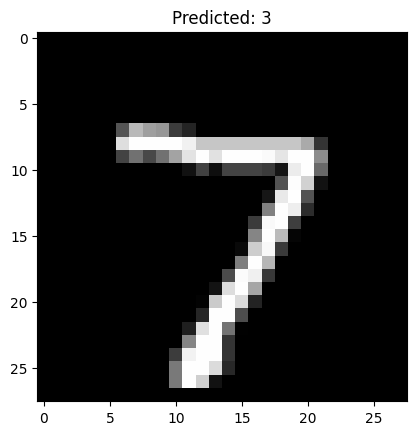

In [24]:
# Assuming 'model' is your trained CNN model

import numpy as np
import matplotlib.pyplot as plt

# Choose an image from the test set for prediction
image_index = 0  # Change this index as needed
sample_image = x_test[image_index].reshape(1, 28, 28, 1)

# Make a prediction
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

# Display the image and predicted class
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.show()


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# File path of the image you want to predict
file_path = '/content/1.jpg'  # Change this to your image file path

# Read the image using OpenCV
input_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to match the MNIST input shape (28x28)
resized_image = cv2.resize(input_image, (28, 28), interpolation=cv2.INTER_AREA)

# Normalize the pixel values
normalized_image = resized_image / 255.0

# Reshape the image to fit the CNN model input shape
sample_image = normalized_image.reshape(1, 28, 28, 1)

# Make a prediction using the model
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

# Display the image and predicted class
plt.imshow(resized_image, cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.show()


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# File path of the image you want to predict
file_path = '/content/2.jpg'  # Change this to your image file path

# Read the image using OpenCV
input_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to match the MNIST input shape (28x28)
resized_image = cv2.resize(input_image, (28, 28), interpolation=cv2.INTER_AREA)

# Normalize the pixel values
normalized_image = resized_image / 255.0

# Reshape the image to fit the CNN model input shape
sample_image = normalized_image.reshape(1, 28, 28, 1)

# Make a prediction using the model
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

# Display the image and predicted class
plt.imshow(resized_image, cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.show()


In [26]:
# Save the model
model.save('mnist_simple_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
